# Dados do trabalho:
Cientista de Dados: Rafael Guimarães Bandoni  
Base de dados utilizada: Dados anonimizados de pacientes do Hospital Sírio Libanês, disponível via Kaggle [neste link](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19) e upado em meu github [neste link](https://github.com/rafabandoni/bootcampalura_datascienceaplicada/blob/main/desafio_final/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx%20-%20Sheet1.csv) para a utilização no notebook.  
Data da conclusão do trabalho e validade dos dados: 24/02/2021

# Introdução

## O desafio

A partir de uma base de dados disponibilizada pelo Hospital Sírio Libanês, criar um modelo que fosse capaz de prever a possibilidade de um paciente precisar de tratamento intensivo (UTI).  
Para tal, a base contava com dados pessoais anonimizados (id de paciente, gênero, faixa etárea) e dados médicos de vários exames, normalizados em média, mediana, máxima, mínima e diferença.  
A base contava, também, com a janela de horas que o paciente estava no Hospital e se, naquele momento, estava presente na UTI ou não.

Para realizar o desafio, pensei, seria necessário seguir alguns passos. Para tanto, foi desenhado o mindmap abaixo:

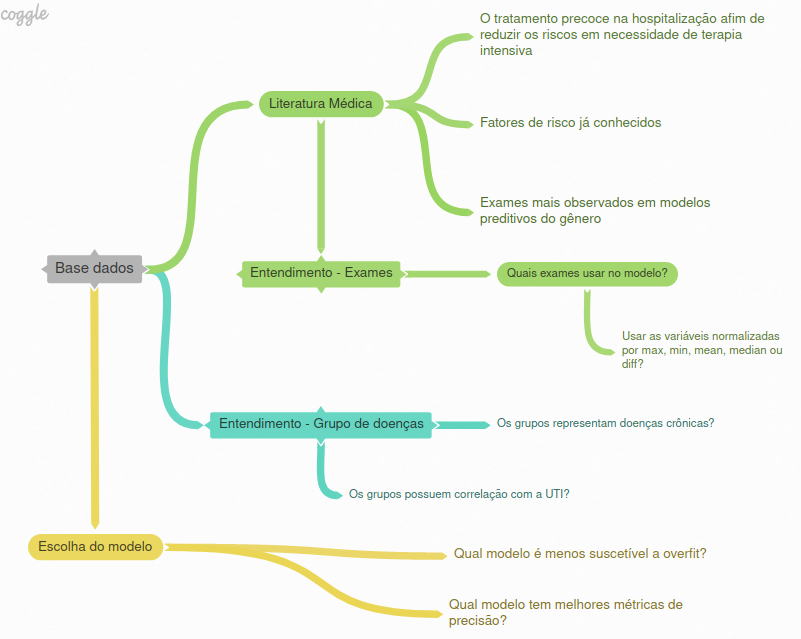

## A base de dados

A base de dados fornecida conta com 1925 linhas, que se dividem entre 384 pacientes. Essas linhas representam a janela de horas em que cada paciente e suas informações se encontram.  
Essas informações, divididas entre os dados pessoais, exames normalizados, janela de tempo e presença na UTI, se dividem em 230 colunas (231, contando o ID do paciente).  

Ao observar a base, é fácil perceber que não vão ser necessários usar todos os dados - nem recomendado, visto que poderia sujar o algoritmo. Portanto, serão feitas limpezas e normalizações nessa base.

## Método de trabalho

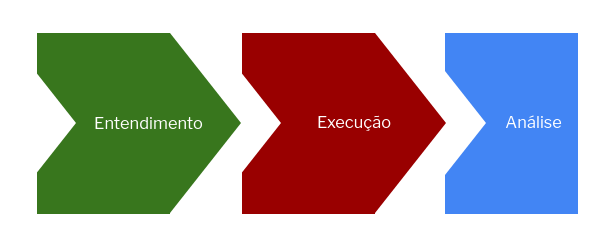

Todo o processo foi dividido nas três etapas acima, sendo:  
- Entendimento: O primeiro passo foi entender o estado da arte dos modelos de previsão para esse tipo de caso. Para isso, foi pesquisada literatura médica para entender quais exames e variáveis levar em conta. Também busquei o entendimento sobre os grupos de doenças, se deviam ou não ser considerados no modelo. Isso feito, foi necessário entender qual normalização era mais relevante para ser considerado e, por fim, entender quais variáveis levar em conta no modelo.
- Execução: Após cada etapa de entendimento, havia uma etapa de execução. Após entender quais exames deveria levar em conta, foi criado um slice do dataframe com esses exames. Após entender como os grupos de doenças estavam comportados, os mesmos foram retirados do modelo. E após entender como avaliar cada modelo, cada um deles foi plotado.
- Análise: A etapa final é a avaliação, os dados precisam, antes de tudo, fazer sentido. Fiz o possível para evitar correlações enganosas e métricas vazias, nesse ponto.

Essas três tapas formaram, assim, o ciclo que segui para completar o trabalho.

# Resumo

## Observações Iniciais

Com a metodologia em mente, vamos a timeline do trabalho:

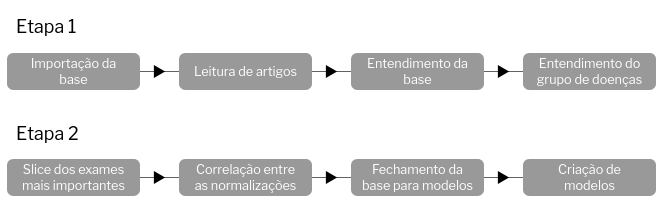

**Etapa 1**  
Após a base importada, busquei por artigos pra ter em mente quais variáveis olhar. A primeira coisa que notei foi que existe um "score" para medir a possibilidade de alguém chegado ao hospital precisar de tratamento intensivo [1], mas esse score não pode ser criado por conta dos dados estarem normalizados.  
Em um outro artigo [2], notei que foram observadas 6 variáveis que podiam auxiliar na predição: idade, taxa respiratória, pressão sistólica do sangue, histórico de fumante, febre, e doença crônica dos rins. Nem todos esses dados estão presentes no dataset, contudo alguns deles, como a doença crônica dos rins, podem indicar alteração em exames presentes. Isso foi levado em conta em todos os artigos lidos.  
Em uma outra literatura [3], os exames observados na previsão foram: lactato desidrogenase, procalcitonina, saturação do oxigênio do pulso, histórico de fumante e contador de linfócitos. Essa literatura também notava uma porcentagem maior de homens necessitarem de UTI.  
Outras literaturas [4] [5] sugerem índices como a escala Glasgow, que também não foi possível ser obtida. Contudo, foram importantes para entender questões que também aparecem em pacientes que podem necessitar da UTI e quais exames são levados em conta.  
Todas essas literaturas estão referenciadas na aba "Referências".

Também fiz algumas observações sobre a base, para entender o quanto dados como gênero e idade importavam, esses recortes podem ser observados e referenciados no código.

Por fim, tentei entender o que os "grupos de doença" podiam ser. Se fossem doenças crônicas, levá-los em conta nos modelos seria extremamente importante. Pra avaliar isso, observei se seu status mudaria ao longo do tempo, e notei que sim. Portanto decidi abandonar essas informações do modelo.

**Etapa 2**  
Na segunda etapa, comecei a montar o dataset para ser usado nos modelos. O primeiro ponto foi realizar o slice apenas com os exames considerados nas literaturas lidas, e naqueles que podiam complementar (como o cálcio para a procalcitonina).  
O primeiro passo foi completar os exames faltants. Para isso, completei as informações anteriores com a seguinte e as posteriores com a anterior, considerando que os resultados "estáticos" seriam melhores que resultado nenhum. Feito isso, removi aqueles que já chegaram no hospital direto pra UTI, ou seja, aqueles que na primeira janela de hora já foram para a UTI - já que esses não me ajudariam a prever os que iriam para a UTI após a chegada. E, por fim, agrupei por ID de paciente, removi as janelas de tempo e indiquei com booleano (1 e 0) se, em algum momento, aquele paciente ia pra UTI ou não.  
Feito isso, busquei entre os exames escolhidos na literatura, qual das normalizações (min, max, mean, median, diff) mais possuía correlação com a ida para a UTI, sendo descartadas aqueles onde nenhuma era maior que 10% (positiva ou negativa).  
Para encerrar a montagem desse dataset, transformei a variável de janela de idade em numérica para ser considerada no modelo, já que idade parece ser um ponto importante.  
Do modelo também foi excluído o ID do paciente, afim de evitar falsas correlações.

## Modelos para análise

Foram utilizados os seguintes modelos:
- DummyClassifier: Um modelo de classificação com base em probabilidade, a ideia é ser usado como uma "base" de resultado.
- Regressão Logística: Modelo matemático para a previsão de variáveis categóricas binárias.
- Árvore de Decisão: Um modelo que cria uma árvore de dados para decidir, com base em afirmações, se algo é verdadeiro ou falso.
- Random Forest Classifier: Um método que utiliza uma serie de árvores de decisão, afim de minimizar efeitos de aleatoriedade e melhorar a performance do modelo.
- Extra Trees: Muito similar ao Random Forest, mas não usa uma amostra do modelo e sim o modelo todo várias vezes.

# Conclusão

## Modelo selecionado
Com base nos testes e parâmetros utilizados, o modelo que melhor performou foi o Random Forest Classifier, com seus parâmetros no padrão, utilizando 5 samples e 10 repetições.  
Nesse modelo temos uma acurácia de 72%, 70% de precisão (taxa de positivos verdadeiros sobre positivos acusados pelo modelo) e 68% de recall (taxa de positivos verdadeiros sobre positivos verdadeiros mais falsos negativos).

# Referências
- [1] [An Early Warning Score to predict ICU admission in COVID-19 positive patients](https://www.journalofinfection.com/article/S0163-4453(20)30324-8/abstract).
- [2] [Exploiting an early warning Nomogram for predicting the risk of ICU admission in patients with COVID-19: a multi-center study in China](https://link.springer.com/article/10.1186/s13049-020-00795-w).
- [3] [Prediction model and risk scores of ICU admission and mortality in COVID-19](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0236618). 
- [4] [Predicting Death and ICU Admission in COVID-19 Patients in ED](https://clinicaltrials.gov/ct2/show/NCT04371562).
- [5] [Predictive symptoms and comorbidities for severe COVID-19
and intensive care unit admission: a systematic review and metaanalysis](https://drive.google.com/file/d/1Z6o6ooweJlQTq1vMrdFvH5penPySDAK_/view?usp=sharing).

# Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression

from sklearn.dummy import DummyClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Importando os dados
Variáveis existentes nessa etapa:
- dados: dados brutos da importação.

## Importação

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/rafabandoni/bootcampalura_datascienceaplicada/main/desafio_final/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx%20-%20Sheet1.csv')
pd.set_option('display.max_columns', None)
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Entendendo os dados

Observando como as variáveis se comportam.

In [ ]:
dados.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


### Cruzamento dos valores

Como se comporta a necessidade de UTI em relação às janelas de tempo?

In [ ]:
pd.crosstab(dados['WINDOW'], dados['ICU'], normalize='index')

ICU,0,1
WINDOW,,
0-2,0.916883,0.083117
2-4,0.846753,0.153247
4-6,0.742857,0.257143
6-12,0.662338,0.337662
ABOVE_12,0.493506,0.506494


Como se comporta a necessidade de UTI em relação à idade?

In [ ]:
pd.crosstab(dados['AGE_ABOVE65'], dados['ICU'], normalize='index')

ICU,0,1
AGE_ABOVE65,,
0,0.820488,0.179512
1,0.632222,0.367778


In [ ]:
pd.crosstab(dados['AGE_PERCENTIL'], dados['ICU'], normalize='index') # interessante como com 30 anos tem mais chances

ICU,0,1
AGE_PERCENTIL,,
10th,0.873171,0.126829
20th,0.865116,0.134884
30th,0.780488,0.219512
40th,0.830000,0.170000
50th,0.763158,0.236842
60th,0.691892,0.308108
70th,0.651282,0.348718
80th,0.673684,0.326316
90th,0.593548,0.406452


Como se comporta a necessidade de UTI em relação ao gênero?

In [ ]:
pd.crosstab(dados['GENDER'], dados['ICU'], normalize='index')

ICU,0,1
GENDER,,
0,0.710288,0.289712
1,0.770423,0.229577


# Entendendo quais métricas são mais importantes para considerar no modelo:
Variáveis criadas nessa etapa:
- dados_disease: slice dos dados apenas com as variáveis "disease group";
- dados_limpos: slice dos dados tratados e limpos;
- dados_slice_examname: slice dos ```dados_limpos``` apenas com o exame que está sendo analisado no momento.

##Grupo de doenças

Aqui, quero entender qual dos grupos de doença pode ter mais complicações. Para isso, farei o seguinte passo a passo:
- Slice dos dados apenas com os dados de "patient identifier", grupos de doença e "ICU";
- Validação se o grupo de doenças muda ao longo do tempo (a hipótese é que não mude, caracterizando uma doença crônica.);
- Seleção apenas dos que foram internados;
- Aplicação do método de Pearson de correlação para verificar.

Como observado abaixo, hipótese é **inválida**, o grupo de doenças detectado pode mudar ao longo do tempo. Portanto, foi descartado do modelo.

In [ ]:
dados_disease = dados[['PATIENT_VISIT_IDENTIFIER',
                       'DISEASE GROUPING 1',
                       'DISEASE GROUPING 2',
                       'DISEASE GROUPING 3',
                       'DISEASE GROUPING 4',
                       'DISEASE GROUPING 5',
                       'DISEASE GROUPING 6',
                       'ICU']] #slice do df

In [ ]:
dados_disease.head()

,PATIENT_VISIT_IDENTIFIER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,ICU
0,0,0.0,0.0,0.0,0.0,1.0,1.0,0
1,0,0.0,0.0,0.0,0.0,1.0,1.0,0
2,0,0.0,0.0,0.0,0.0,1.0,1.0,0
3,0,0.0,0.0,0.0,0.0,1.0,1.0,0
4,0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [ ]:
dados_disease = dados_disease.query('ICU == 1')
dados_disease # esse dado não parece ser constante - vou descartar para o modelo

,PATIENT_VISIT_IDENTIFIER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,ICU
4,0,0.0,0.0,0.0,0.0,1.0,1.0,1
5,1,0.0,0.0,0.0,0.0,0.0,0.0,1
6,1,0.0,0.0,0.0,0.0,0.0,0.0,1
7,1,0.0,0.0,0.0,0.0,0.0,0.0,1
8,1,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...
1897,379,0.0,0.0,0.0,0.0,0.0,0.0,1
1898,379,0.0,0.0,0.0,0.0,1.0,0.0,1
1899,379,0.0,0.0,0.0,0.0,0.0,0.0,1
1904,380,0.0,0.0,0.0,1.0,0.0,0.0,1


## Correlação dos exames
Para escolher quais variáveis considerar no modelo

### Limpando o dataset

Completando os dados faltantes. Os dados faltantes antes serão completados com os posteriores, e vice-versa.

In [ ]:
def preenche_tabela(dados): #completando os dados faltantes pra frente ou pra trás
  features_continuas_colunas = dados.iloc[:, 13:-2].columns
  features_continuas = dados.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
  features_categoricas = dados.iloc[:, :13]
  saida = dados.iloc[:, -2:]
  dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True, axis=1)
  dados_finais.columns = dados.columns
  return dados_finais

In [ ]:
dados_limpos = preenche_tabela(dados)

Removendo pacientes que já chegaram pra UTI, visto que o objetivo é prever o risco de UTI para quem chegar no hospital.

In [ ]:
a_remover = dados_limpos.query('WINDOW=="0-2" and ICU=="1"')['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query('PATIENT_VISIT_IDENTIFIER not in @a_remover')
dados_limpos = dados_limpos.dropna()
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1760.000000,1760.000000,1760.000000,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1

Agrupando pelas primeiras horas dos que, em algum momento, foram pra UTI. Esse agrupamento serve para ter os dados do momento 0 em que o paciente cheogu no hospital e, com isso, saber se com os dados de entrada ele pode precisar ou não de UTI.

In [ ]:
def prepare_window(rows): # buscando os pacientes que em algum momento foram pra UTI a partir da primeira hora
  if(np.any(rows['ICU'])):
    rows.loc[rows['WINDOW']=='0-2', 'ICU'] = 1
  return rows.loc[rows['WINDOW'] == '0-2']

dados_limpos = dados_limpos.groupby('PATIENT_VISIT_IDENTIFIER').apply(prepare_window)
dados_limpos.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.3

**Importante:**  
Com a última limpeza do dataset, o modelo vai considerar a primeira hora como crítica para a UTI. Ou seja, será possível entender quais variáveis presentes na primeira hora podem impactar - o que significa que variações nas horas seguintes são desconsideradas.

### Criando um slice do dataset
Usando as variáveis citadas como referências nos artigos [1], [2], [3] e [4].

In [ ]:
# anotação das normalizações
# median, mean, min, max, diff

In [ ]:
dados_limpos = dados_limpos[['PATIENT_VISIT_IDENTIFIER',
                             'AGE_ABOVE65',
                             'AGE_PERCENTIL',
                             'GENDER',
                             'HTN',
                             'IMMUNOCOMPROMISED',
                             'CALCIUM_MEDIAN',
                             'CREATININ_MEDIAN',
                             'LACTATE_MEDIAN',
                             'LINFOCITOS_MEDIAN',
                             'NEUTROPHILES_MEDIAN',
                             'P02_ARTERIAL_MEDIAN',
                             'P02_VENOUS_MEDIAN',
                             'PC02_ARTERIAL_MEDIAN',
                             'PC02_VENOUS_MEDIAN',
                             'PCR_MEDIAN',
                             'SAT02_ARTERIAL_MEDIAN',
                             'SAT02_VENOUS_MEDIAN',
                             'BLOODPRESSURE_DIASTOLIC_MEDIAN',
                             'BLOODPRESSURE_SISTOLIC_MEDIAN',
                             'HEART_RATE_MEDIAN',
                             'RESPIRATORY_RATE_MEDIAN',
                             'TEMPERATURE_MEDIAN',
                             'OXYGEN_SATURATION_MEDIAN',
                             'CALCIUM_MEAN',
                             'CREATININ_MEAN',
                             'LACTATE_MEAN',
                             'LINFOCITOS_MEAN',
                             'NEUTROPHILES_MEAN',
                             'P02_ARTERIAL_MEAN',
                             'P02_VENOUS_MEAN',
                             'PC02_ARTERIAL_MEAN',
                             'PC02_VENOUS_MEAN',
                             'PCR_MEAN',
                             'SAT02_ARTERIAL_MEAN',
                             'SAT02_VENOUS_MEAN',
                             'BLOODPRESSURE_DIASTOLIC_MEAN',
                             'BLOODPRESSURE_SISTOLIC_MEAN',
                             'HEART_RATE_MEAN',
                             'RESPIRATORY_RATE_MEAN',
                             'TEMPERATURE_MEAN',
                             'OXYGEN_SATURATION_MEAN',
                             'CALCIUM_MIN',
                             'CREATININ_MIN',
                             'LACTATE_MIN',
                             'LINFOCITOS_MIN',
                             'NEUTROPHILES_MIN',
                             'P02_ARTERIAL_MIN',
                             'P02_VENOUS_MIN',
                             'PC02_ARTERIAL_MIN',
                             'PC02_VENOUS_MIN',
                             'PCR_MIN',
                             'SAT02_ARTERIAL_MIN',
                             'SAT02_VENOUS_MIN',
                             'BLOODPRESSURE_DIASTOLIC_MIN',
                             'BLOODPRESSURE_SISTOLIC_MIN',
                             'HEART_RATE_MIN',
                             'RESPIRATORY_RATE_MIN',
                             'TEMPERATURE_MIN',
                             'OXYGEN_SATURATION_MIN',
                             'CALCIUM_MAX',
                             'CREATININ_MAX',
                             'LACTATE_MAX',
                             'LINFOCITOS_MAX',
                             'NEUTROPHILES_MAX',
                             'P02_ARTERIAL_MAX',
                             'P02_VENOUS_MAX',
                             'PC02_ARTERIAL_MAX',
                             'PC02_VENOUS_MAX',
                             'PCR_MAX',
                             'SAT02_ARTERIAL_MAX',
                             'SAT02_VENOUS_MAX',
                             'BLOODPRESSURE_DIASTOLIC_MAX',
                             'BLOODPRESSURE_SISTOLIC_MAX',
                             'HEART_RATE_MAX',
                             'RESPIRATORY_RATE_MAX',
                             'TEMPERATURE_MAX',
                             'OXYGEN_SATURATION_MAX',
                             'CALCIUM_DIFF',
                             'CREATININ_DIFF',
                             'LACTATE_DIFF',
                             'LINFOCITOS_DIFF',
                             'NEUTROPHILES_DIFF',
                             'P02_ARTERIAL_DIFF',
                             'P02_VENOUS_DIFF',
                             'PC02_ARTERIAL_DIFF',
                             'PC02_VENOUS_DIFF',
                             'PCR_DIFF',
                             'SAT02_ARTERIAL_DIFF',
                             'SAT02_VENOUS_DIFF',
                             'BLOODPRESSURE_DIASTOLIC_DIFF',
                             'BLOODPRESSURE_SISTOLIC_DIFF',
                             'HEART_RATE_DIFF',
                             'RESPIRATORY_RATE_DIFF',
                             'TEMPERATURE_DIFF',
                             'OXYGEN_SATURATION_DIFF',
                             'WINDOW',
                             'ICU']]

In [ ]:
dados_limpos.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,CALCIUM_MEDIAN,CREATININ_MEDIAN,LACTATE_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,CALCIUM_MEAN,CREATININ_MEAN,LACTATE_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,P02_ARTERIAL_MEAN,P02_VENOUS_MEAN,PC02_ARTERIAL_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,SAT02_ARTERIAL_MEAN,SAT02_VENOUS_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,CALCIUM_MIN,CREATININ_MIN,LACTATE_MIN,LINFOCITOS_MIN,NEUTROPHILES_MIN,P02_ARTERIAL_MIN,P02_VENOUS_MIN,PC02_ARTERIAL_MIN,PC02_VENOUS_MIN,PCR_MIN,SAT02_ARTERIAL_MIN,SAT02_VENOUS_MIN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,CALCIUM_MAX,CREATININ_MAX,LACTATE_MAX,LINFOCITOS_MAX,NEUTROPHILES_MAX,P02_ARTERIAL_MAX,P02_VENOUS_MAX,PC02_ARTERIAL_MAX,PC02_VENOUS_MAX,PCR_MAX,SAT02_ARTERIAL_MAX,SAT02_VENOUS_MAX,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,CALCIUM_DIFF,CREATININ_DIFF,LACTATE_DIFF,LINFOCITOS_DIFF,NEUTROPHILES_DIFF,P02_ARTERIAL_DIFF,P02_VENOUS_DIFF,PC02_ARTERIAL_DIFF,PC02_VENOUS_DIFF,PCR_DIFF,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,60th,0,0.0,0.0,0.183673,-0.868365,1.000000,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.939394,0.345679,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.183673,-0.868365,1.000000,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.939394,0.345679,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.183673,-0.868365,1.000000,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.939394,0.345679,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,0.183673,-0.868365,1.000000,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.939394,0.345679,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,10th,0,0.0,0.0,0.357143,-0.912243,1.000000,-0.908714,-0.412965,-0.170732,-0.704142,-0.77931,-0.754601,-0.939887,0.939394,0.345679,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,0.357143,-0.912243,1.000000,-0.908714,-0.412965,-0.170732,-0.704142,-0.77931,-0.754601,-0.939887,0.939394,0.345679,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,0.357143,-0.912243,1.000000,-0.908714,-0.412965,-0.170732,-0.704142,-0.77931,-0.754601,-0.939887,0.939394,0.345679,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,0.357143,-0.912243,1.000000,-0.908714,-0.412965,-0.170732,-0.704142,-0.77931,-0.754601,-0.939887,0.939394,0.345679,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,0-2,1
3,15,3,0,40th,1,0.0,1.0,0.326531,-0.968861,-0.828421,-0.836100,-0.784714,-0.170732,-0.633136,-0.77931,-0.779141,-0.503592,0.939394,0.580247,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.326531,-0.968861,-0.828421,-0.836100,-0.784714,-0.170732,-0.633136,-0.77931,-0.779141,-0.503592,0.939394,0.580247,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.326531,-0.968861,-0.828421,-0.836100,-0.784714,-0.170732,-0.633136,-0.77931,-0.779141,-0.503592,0

### Correlações das variáveis:
Entre média, mediana, mínimo, máximo e diferença - qual a mais impactante nas internações?  
*Correlações entre 0.1 e -0.1 serão descartadas para maior fidelidade do modelo.*  
*Em caso de correlações iguais, será considerada a máxima.*

Cálcio:

In [ ]:
dados_slice_calcium = dados_limpos[['CALCIUM_MEDIAN', 'CALCIUM_MIN', 'CALCIUM_MAX', 'CALCIUM_DIFF', 'CALCIUM_MEAN', 'WINDOW', 'ICU']]
dados_slice_calcium.corr()

,CALCIUM_MEDIAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CALCIUM_MEAN,ICU
CALCIUM_MEDIAN,1.000000,1.000000,1.000000,NaN,1.000000,-0.224415
CALCIUM_MIN,1.000000,1.000000,1.000000,NaN,1.000000,-0.224415
CALCIUM_MAX,1.000000,1.000000,1.000000,NaN,1.000000,-0.224415
CALCIUM_DIFF,NaN,NaN,NaN,NaN,NaN,NaN
CALCIUM_MEAN,1.000000,1.000000,1.000000,NaN,1.000000,-0.224415
ICU,-0.224415,-0.224415,-0.224415,NaN,-0.224415,1.000000


Respiratory Rate

In [ ]:
dados_slice_respiratoryrate = dados_limpos[['RESPIRATORY_RATE_MEDIAN', 'RESPIRATORY_RATE_MIN', 'RESPIRATORY_RATE_MAX', 'RESPIRATORY_RATE_DIFF', 'RESPIRATORY_RATE_MEAN', 'WINDOW', 'ICU']]
dados_slice_respiratoryrate.corr()

,RESPIRATORY_RATE_MEDIAN,RESPIRATORY_RATE_MIN,RESPIRATORY_RATE_MAX,RESPIRATORY_RATE_DIFF,RESPIRATORY_RATE_MEAN,ICU
RESPIRATORY_RATE_MEDIAN,1.000000,0.901227,0.963928,0.211701,0.989124,0.208922
RESPIRATORY_RATE_MIN,0.901227,1.000000,0.845816,-0.177844,0.943939,0.173043
RESPIRATORY_RATE_MAX,0.963928,0.845816,1.000000,0.374548,0.967765,0.213938
RESPIRATORY_RATE_DIFF,0.211701,-0.177844,0.374548,1.000000,0.144543,0.093877
RESPIRATORY_RATE_MEAN,0.989124,0.943939,0.967765,0.144543,1.000000,0.207911
ICU,0.208922,0.173043,0.213938,0.093877,0.207911,1.000000


Creatinin

In [ ]:
dados_slice_creatinin =  dados_limpos[['CREATININ_MEDIAN',
                                       'CREATININ_MEAN',
                                       'CREATININ_MAX',
                                       'CREATININ_DIFF',
                                       'CREATININ_MIN',
                                       'ICU']]
dados_slice_creatinin.corr()

,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MAX,CREATININ_DIFF,CREATININ_MIN,ICU
CREATININ_MEDIAN,1.000000,1.000000,1.000000,NaN,1.000000,0.159168
CREATININ_MEAN,1.000000,1.000000,1.000000,NaN,1.000000,0.159168
CREATININ_MAX,1.000000,1.000000,1.000000,NaN,1.000000,0.159168
CREATININ_DIFF,NaN,NaN,NaN,NaN,NaN,NaN
CREATININ_MIN,1.000000,1.000000,1.000000,NaN,1.000000,0.159168
ICU,0.159168,0.159168,0.159168,NaN,0.159168,1.000000


Lactate

In [ ]:
dados_slice_lactate =  dados_limpos[['LACTATE_MEDIAN',
                                       'LACTATE_MEAN',
                                       'LACTATE_MAX',
                                       'LACTATE_DIFF',
                                       'LACTATE_MIN',
                                       'ICU']]
dados_slice_lactate.corr()

,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MAX,LACTATE_DIFF,LACTATE_MIN,ICU
LACTATE_MEDIAN,1.000000,1.000000,1.000000,NaN,1.000000,-0.207999
LACTATE_MEAN,1.000000,1.000000,1.000000,NaN,1.000000,-0.207999
LACTATE_MAX,1.000000,1.000000,1.000000,NaN,1.000000,-0.207999
LACTATE_DIFF,NaN,NaN,NaN,NaN,NaN,NaN
LACTATE_MIN,1.000000,1.000000,1.000000,NaN,1.000000,-0.207999
ICU,-0.207999,-0.207999,-0.207999,NaN,-0.207999,1.000000


Linfocitos

In [ ]:
dados_slice_linfocitos =  dados_limpos[['LINFOCITOS_MEDIAN',
                                     'LINFOCITOS_MEAN',
                                     'LINFOCITOS_MAX',
                                     'LINFOCITOS_DIFF',
                                     'LINFOCITOS_MIN',
                                     'ICU']]
dados_slice_linfocitos.corr()

,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MAX,LINFOCITOS_DIFF,LINFOCITOS_MIN,ICU
LINFOCITOS_MEDIAN,1.00000,1.00000,1.00000,NaN,1.00000,-0.17305
LINFOCITOS_MEAN,1.00000,1.00000,1.00000,NaN,1.00000,-0.17305
LINFOCITOS_MAX,1.00000,1.00000,1.00000,NaN,1.00000,-0.17305
LINFOCITOS_DIFF,NaN,NaN,NaN,NaN,NaN,NaN
LINFOCITOS_MIN,1.00000,1.00000,1.00000,NaN,1.00000,-0.17305
ICU,-0.17305,-0.17305,-0.17305,NaN,-0.17305,1.00000


Neutrophiles

In [ ]:
dados_slice_neutrophiles =  dados_limpos[['NEUTROPHILES_MEDIAN',
                                        'NEUTROPHILES_MEAN',
                                        'NEUTROPHILES_MAX',
                                        'NEUTROPHILES_DIFF',
                                        'NEUTROPHILES_MIN',
                                        'ICU']]
dados_slice_neutrophiles.corr()

,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,NEUTROPHILES_MIN,ICU
NEUTROPHILES_MEDIAN,1.00000,1.00000,1.00000,NaN,1.00000,0.17362
NEUTROPHILES_MEAN,1.00000,1.00000,1.00000,NaN,1.00000,0.17362
NEUTROPHILES_MAX,1.00000,1.00000,1.00000,NaN,1.00000,0.17362
NEUTROPHILES_DIFF,NaN,NaN,NaN,NaN,NaN,NaN
NEUTROPHILES_MIN,1.00000,1.00000,1.00000,NaN,1.00000,0.17362
ICU,0.17362,0.17362,0.17362,NaN,0.17362,1.00000


PO2 Arterial

In [ ]:
dados_slice_po2_arterial =  dados_limpos[['P02_ARTERIAL_MEDIAN',
                                        'P02_ARTERIAL_MEAN',
                                        'P02_ARTERIAL_MAX',
                                        'P02_ARTERIAL_DIFF',
                                        'P02_ARTERIAL_MIN',
                                        'ICU']]
dados_slice_po2_arterial.corr()

,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_ARTERIAL_MIN,ICU
P02_ARTERIAL_MEDIAN,1.000000,1.000000,1.000000,NaN,1.000000,-0.043503
P02_ARTERIAL_MEAN,1.000000,1.000000,1.000000,NaN,1.000000,-0.043503
P02_ARTERIAL_MAX,1.000000,1.000000,1.000000,NaN,1.000000,-0.043503
P02_ARTERIAL_DIFF,NaN,NaN,NaN,NaN,NaN,NaN
P02_ARTERIAL_MIN,1.000000,1.000000,1.000000,NaN,1.000000,-0.043503
ICU,-0.043503,-0.043503,-0.043503,NaN,-0.043503,1.000000


PO2 Venous

In [ ]:
dados_slice_po2_venous=  dados_limpos[['P02_VENOUS_MEDIAN',
                                'P02_VENOUS_MEAN',
                                'P02_VENOUS_MAX',
                                'P02_VENOUS_DIFF',
                                'P02_VENOUS_MIN',
                                'ICU']]
dados_slice_po2_venous.corr()

,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MAX,P02_VENOUS_DIFF,P02_VENOUS_MIN,ICU
P02_VENOUS_MEDIAN,1.00000,1.00000,1.00000,NaN,1.00000,0.00513
P02_VENOUS_MEAN,1.00000,1.00000,1.00000,NaN,1.00000,0.00513
P02_VENOUS_MAX,1.00000,1.00000,1.00000,NaN,1.00000,0.00513
P02_VENOUS_DIFF,NaN,NaN,NaN,NaN,NaN,NaN
P02_VENOUS_MIN,1.00000,1.00000,1.00000,NaN,1.00000,0.00513
ICU,0.00513,0.00513,0.00513,NaN,0.00513,1.00000


PCO2 Arterial

In [ ]:
dados_slice_pco2_arterial=  dados_limpos[['PC02_ARTERIAL_MEDIAN',
                                       'PC02_ARTERIAL_MEAN',
                                       'PC02_ARTERIAL_MAX',
                                       'PC02_ARTERIAL_DIFF',
                                       'PC02_ARTERIAL_MIN',
                                       'ICU']]
dados_slice_po2_arterial.corr()

,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_ARTERIAL_MIN,ICU
P02_ARTERIAL_MEDIAN,1.000000,1.000000,1.000000,NaN,1.000000,-0.043503
P02_ARTERIAL_MEAN,1.000000,1.000000,1.000000,NaN,1.000000,-0.043503
P02_ARTERIAL_MAX,1.000000,1.000000,1.000000,NaN,1.000000,-0.043503
P02_ARTERIAL_DIFF,NaN,NaN,NaN,NaN,NaN,NaN
P02_ARTERIAL_MIN,1.000000,1.000000,1.000000,NaN,1.000000,-0.043503
ICU,-0.043503,-0.043503,-0.043503,NaN,-0.043503,1.000000


PCO2 Venous

In [ ]:
dados_slice_pco2_venous =  dados_limpos[['PC02_VENOUS_MEDIAN',
                                          'PC02_VENOUS_MEAN',
                                          'PC02_VENOUS_MAX',
                                          'PC02_VENOUS_DIFF',
                                          'PC02_VENOUS_MIN',
                                          'ICU']]
dados_slice_pco2_venous.corr()

,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PC02_VENOUS_MIN,ICU
PC02_VENOUS_MEDIAN,1.000000,1.000000,1.000000,NaN,1.000000,-0.156372
PC02_VENOUS_MEAN,1.000000,1.000000,1.000000,NaN,1.000000,-0.156372
PC02_VENOUS_MAX,1.000000,1.000000,1.000000,NaN,1.000000,-0.156372
PC02_VENOUS_DIFF,NaN,NaN,NaN,NaN,NaN,NaN
PC02_VENOUS_MIN,1.000000,1.000000,1.000000,NaN,1.000000,-0.156372
ICU,-0.156372,-0.156372,-0.156372,NaN,-0.156372,1.000000


PCR

In [ ]:
dados_slice_pcr =  dados_limpos[['PCR_MEDIAN',
                                          'PCR_MEAN',
                                          'PCR_MAX',
                                          'PCR_DIFF',
                                          'PCR_MIN',
                                          'ICU']]
dados_slice_pcr.corr()

,PCR_MEDIAN,PCR_MEAN,PCR_MAX,PCR_DIFF,PCR_MIN,ICU
PCR_MEDIAN,1.000000,1.000000,1.000000,NaN,1.000000,0.296455
PCR_MEAN,1.000000,1.000000,1.000000,NaN,1.000000,0.296455
PCR_MAX,1.000000,1.000000,1.000000,NaN,1.000000,0.296455
PCR_DIFF,NaN,NaN,NaN,NaN,NaN,NaN
PCR_MIN,1.000000,1.000000,1.000000,NaN,1.000000,0.296455
ICU,0.296455,0.296455,0.296455,NaN,0.296455,1.000000


SAT02 Arterial

In [ ]:
dados_slice_sato2_arterial =  dados_limpos[['SAT02_ARTERIAL_MEDIAN',
                                            'SAT02_ARTERIAL_MEAN',
                                            'SAT02_ARTERIAL_MAX',
                                            'SAT02_ARTERIAL_DIFF',
                                            'SAT02_ARTERIAL_MIN',
                                            'ICU']]
dados_slice_sato2_arterial.corr()

,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_ARTERIAL_MIN,ICU
SAT02_ARTERIAL_MEDIAN,1.000000,1.000000,1.000000,NaN,1.000000,-0.097585
SAT02_ARTERIAL_MEAN,1.000000,1.000000,1.000000,NaN,1.000000,-0.097585
SAT02_ARTERIAL_MAX,1.000000,1.000000,1.000000,NaN,1.000000,-0.097585
SAT02_ARTERIAL_DIFF,NaN,NaN,NaN,NaN,NaN,NaN
SAT02_ARTERIAL_MIN,1.000000,1.000000,1.000000,NaN,1.000000,-0.097585
ICU,-0.097585,-0.097585,-0.097585,NaN,-0.097585,1.000000


SAT02 Venous

In [ ]:
dados_slice_sato2_venous =  dados_limpos[['SAT02_VENOUS_MEDIAN',
                                          'SAT02_VENOUS_MEAN',
                                          'SAT02_VENOUS_MAX',
                                          'SAT02_VENOUS_DIFF',
                                          'SAT02_VENOUS_MIN',
                                          'ICU']]
dados_slice_sato2_venous.corr()

,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SAT02_VENOUS_MIN,ICU
SAT02_VENOUS_MEDIAN,1.000000,1.000000,1.000000,NaN,1.000000,-0.056879
SAT02_VENOUS_MEAN,1.000000,1.000000,1.000000,NaN,1.000000,-0.056879
SAT02_VENOUS_MAX,1.000000,1.000000,1.000000,NaN,1.000000,-0.056879
SAT02_VENOUS_DIFF,NaN,NaN,NaN,NaN,NaN,NaN
SAT02_VENOUS_MIN,1.000000,1.000000,1.000000,NaN,1.000000,-0.056879
ICU,-0.056879,-0.056879,-0.056879,NaN,-0.056879,1.000000


Bloodpressure Diastolic

In [ ]:
dados_slice_bloodpressure_diastolic =  dados_limpos[['BLOODPRESSURE_DIASTOLIC_MEDIAN',
                                                     'BLOODPRESSURE_DIASTOLIC_MEAN',
                                                     'BLOODPRESSURE_DIASTOLIC_MAX',
                                                     'BLOODPRESSURE_DIASTOLIC_DIFF',
                                                     'BLOODPRESSURE_DIASTOLIC_MIN',
                                                     'ICU']]
dados_slice_bloodpressure_diastolic.corr()

,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_DIASTOLIC_MIN,ICU
BLOODPRESSURE_DIASTOLIC_MEDIAN,1.000000,0.992260,0.920131,-0.142989,0.958159,-0.212403
BLOODPRESSURE_DIASTOLIC_MEAN,0.992260,1.000000,0.943680,-0.114055,0.964457,-0.201210
BLOODPRESSURE_DIASTOLIC_MAX,0.920131,0.943680,1.000000,0.209492,0.837297,-0.166832
BLOODPRESSURE_DIASTOLIC_DIFF,-0.142989,-0.114055,0.209492,1.000000,-0.359209,0.065228
BLOODPRESSURE_DIASTOLIC_MIN,0.958159,0.964457,0.837297,-0.359209,1.000000,-0.195703
ICU,-0.212403,-0.201210,-0.166832,0.065228,-0.195703,1.000000


Bloodpressure Sistolic

In [ ]:
dados_slice_bloodpressure_sistolic=  dados_limpos[['BLOODPRESSURE_SISTOLIC_MEDIAN',
                                                   'BLOODPRESSURE_SISTOLIC_MEAN',
                                                   'BLOODPRESSURE_SISTOLIC_MAX',
                                                   'BLOODPRESSURE_SISTOLIC_DIFF',
                                                   'BLOODPRESSURE_SISTOLIC_MIN',
                                                   'ICU']]
dados_slice_bloodpressure_sistolic.corr()

,BLOODPRESSURE_SISTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MAX,BLOODPRESSURE_SISTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_MIN,ICU
BLOODPRESSURE_SISTOLIC_MEDIAN,1.000000,0.996952,0.965267,-0.001986,0.961314,0.079157
BLOODPRESSURE_SISTOLIC_MEAN,0.996952,1.000000,0.974041,0.007697,0.965484,0.084371
BLOODPRESSURE_SISTOLIC_MAX,0.965267,0.974041,1.000000,0.225857,0.888584,0.109073
BLOODPRESSURE_SISTOLIC_DIFF,-0.001986,0.007697,0.225857,1.000000,-0.246168,0.107106
BLOODPRESSURE_SISTOLIC_MIN,0.961314,0.965484,0.888584,-0.246168,1.000000,0.058086
ICU,0.079157,0.084371,0.109073,0.107106,0.058086,1.000000


Heart Rate

In [ ]:
dados_slice_heart_rate =  dados_limpos[['HEART_RATE_MEDIAN',
                                        'HEART_RATE_MEAN',
                                        'HEART_RATE_MAX',
                                        'HEART_RATE_DIFF',
                                        'HEART_RATE_MIN',
                                        'ICU']]
dados_slice_heart_rate.corr()

,HEART_RATE_MEDIAN,HEART_RATE_MEAN,HEART_RATE_MAX,HEART_RATE_DIFF,HEART_RATE_MIN,ICU
HEART_RATE_MEDIAN,1.000000,0.993374,0.979060,0.123247,0.945631,-0.053569
HEART_RATE_MEAN,0.993374,1.000000,0.981469,0.070140,0.970422,-0.048263
HEART_RATE_MAX,0.979060,0.981469,1.000000,0.250699,0.913362,-0.047453
HEART_RATE_DIFF,0.123247,0.070140,0.250699,1.000000,-0.165168,-0.013554
HEART_RATE_MIN,0.945631,0.970422,0.913362,-0.165168,1.000000,-0.042645
ICU,-0.053569,-0.048263,-0.047453,-0.013554,-0.042645,1.000000


Temperature

In [ ]:
dados_slice_temperature =  dados_limpos[['TEMPERATURE_MEDIAN',
                                         'TEMPERATURE_MEAN',
                                         'TEMPERATURE_MAX',
                                         'TEMPERATURE_DIFF',
                                         'TEMPERATURE_MIN',
                                         'ICU']]
dados_slice_temperature.corr()

,TEMPERATURE_MEDIAN,TEMPERATURE_MEAN,TEMPERATURE_MAX,TEMPERATURE_DIFF,TEMPERATURE_MIN,ICU
TEMPERATURE_MEDIAN,1.000000,0.993236,0.950932,0.076791,0.961764,0.086098
TEMPERATURE_MEAN,0.993236,1.000000,0.967198,0.089025,0.972975,0.086764
TEMPERATURE_MAX,0.950932,0.967198,1.000000,0.330440,0.891595,0.079548
TEMPERATURE_DIFF,0.076791,0.089025,0.330440,1.000000,-0.132778,-0.006336
TEMPERATURE_MIN,0.961764,0.972975,0.891595,-0.132778,1.000000,0.086575
ICU,0.086098,0.086764,0.079548,-0.006336,0.086575,1.000000


Oxygen Saturation

In [ ]:
dados_slice_oxygen_saturation =  dados_limpos[['OXYGEN_SATURATION_MEDIAN',
                                               'OXYGEN_SATURATION_MEAN',
                                               'OXYGEN_SATURATION_MAX',
                                               'OXYGEN_SATURATION_DIFF',
                                               'OXYGEN_SATURATION_MIN',
                                               'ICU']]
dados_slice_oxygen_saturation.corr()

,OXYGEN_SATURATION_MEDIAN,OXYGEN_SATURATION_MEAN,OXYGEN_SATURATION_MAX,OXYGEN_SATURATION_DIFF,OXYGEN_SATURATION_MIN,ICU
OXYGEN_SATURATION_MEDIAN,1.000000,0.990731,0.946920,-0.020382,0.932781,-0.159110
OXYGEN_SATURATION_MEAN,0.990731,1.000000,0.966910,-0.021277,0.952713,-0.147612
OXYGEN_SATURATION_MAX,0.946920,0.966910,1.000000,0.215755,0.861809,-0.131615
OXYGEN_SATURATION_DIFF,-0.020382,-0.021277,0.215755,1.000000,-0.309347,0.020897
OXYGEN_SATURATION_MIN,0.932781,0.952713,0.861809,-0.309347,1.000000,-0.139034
ICU,-0.159110,-0.147612,-0.131615,0.020897,-0.139034,1.000000


# Criando o Dataset para o modelo
Variáveis criadas nessa etapa:
- dados_metricas_corr: dataframe apenas com as variáveis que mais tem correlação com a necessidade de UTI.

## Montagem inicial

Para fechar o dataset, vamos escolher os dados básicos (número do paciente, genero, idade, etc) e as métricas de exame com correlação maior que 10% - positiva ou negativa. Foram elas:

Métricas que o valor máximo é mais relevante:  
LACTATE_MAX (correlação inversa)  
NEUTROPHILES_MAX  
PC02_VENOUS_MAX (correlação inversa)  
CALCIUM_MAX (correlação inversa)  
RESPIRATORY_RATE_MAX  
CREATININ_MAX  
LINFOCITOS_MAX (correlação inversa)  
PCR_MAX  

Métricas que a variação é mais relevante:  
BLOODPRESSURE_DIASTOLIC_DIFF  

Métricas onde a média e a mediana são mais relevantes:  
BLOODPRESSURE_SISTOLIC_MEDIAN (correlação inversa)  
OXYGEN_SATURATION_MEAN (correlação inversa)  

Nota¹: para as métricas que a correlação era igual entre todas as normalizações, foi escolhida a máxima.  
Nota²: as métricas destacadas como "correlação inversa" significam que uma queda nessas variáveis representa um aumento de chance de ir para a UTI nas próximas horas.

In [ ]:
dados_metricas_corr = dados_limpos[['PATIENT_VISIT_IDENTIFIER',
                                    'AGE_PERCENTIL',
                                    'GENDER',
                                    'CALCIUM_MAX',
                                    'LACTATE_MAX',
                                    'NEUTROPHILES_MAX',
                                    'CREATININ_MAX',
                                    'LINFOCITOS_MAX',
                                    'PCR_MAX',
                                    'PC02_VENOUS_MAX',
                                    'RESPIRATORY_RATE_MAX',
                                    'BLOODPRESSURE_DIASTOLIC_DIFF',
                                    'BLOODPRESSURE_SISTOLIC_MEDIAN',
                                    'OXYGEN_SATURATION_MEAN',
                                    'WINDOW',
                                    'ICU']]

## Categorização

Categorizar o percentil de idade:

In [ ]:
dados_metricas_corr['AGE_PERCENTIL'] = dados_metricas_corr['AGE_PERCENTIL'].astype('category').cat.codes

Dataframe para o modelo:

In [ ]:
dados_metricas_corr.head()

,,PATIENT_VISIT_IDENTIFIER,AGE_PERCENTIL,GENDER,CALCIUM_MAX,LACTATE_MAX,NEUTROPHILES_MAX,CREATININ_MAX,LINFOCITOS_MAX,PCR_MAX,PC02_VENOUS_MAX,RESPIRATORY_RATE_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_MEDIAN,OXYGEN_SATURATION_MEAN,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,
0,0,0,5,0,0.183673,1.000000,-0.868747,-0.868365,-0.914938,-0.875236,-0.754601,-0.636364,-1.000000,-0.230769,0.736842,0-2,1
2,10,2,0,0,0.357143,1.000000,-0.412965,-0.912243,-0.908714,-0.939887,-0.754601,-0.575758,-0.547826,-0.815385,0.935673,0-2,1
3,15,3,3,1,0.326531,-0.828421,-0.784714,-0.968861,-0.836100,-0.503592,-0.779141,-0.515152,-1.000000,-0.369231,0.684211,0-2,0
4,20,4,0,0,0.357143,1.000000,-0.812725,-0.913659,-0.641079,-0.990926,-0.754601,-0.575758,-1.000000,-0.153846,0.868421,0-2,0
5,25,5,0,0,0.357143,1.000000,-0.846339,-0.891012,-0.340249,-0.997732,-0.754601,-0.575758,-0.826087,-0.538462,0.815789,0-2,0


# Modelos preditivos
Variáveis criadas nessa etapa:
- modelo_modeloname: dataframe iterado de cada modelo a ser jogada na função para rodar o modelo.

## Função dos modelos

Defininco uma função que rodará o modelo ao ser chamada:

In [ ]:
def roda_modelo_cv(modelo, dados, n_splits, n_repeats): 

  np.random.seed(1231234)
  dados = dados.sample(frac=1).reset_index(drop=True) 
  X_columns = dados_metricas_corr.describe().columns
  X = dados_metricas_corr[X_columns].drop(['PATIENT_VISIT_IDENTIFIER', 'ICU'], axis=1)
  y = dados_metricas_corr['ICU'] #definindo x e y

  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

  modelo.fit(X_train, y_train)
  predicao = modelo.predict(X_test)
  prob_predict = modelo.predict_proba(X_test)

  cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats) # estratificando o modelo
  resultados = cross_validate(modelo, X, y, cv=cv, scoring='roc_auc', return_train_score=True) # validação cruzada do modelo

  auc_medio = np.mean(resultados['test_score'])
  auc_medio_treino = np.mean(resultados['train_score']) # retornando tbm o auc do modelo de treino

  auc_std = np.std(resultados['test_score'])

  print(f'AUC Intervalo: {auc_medio - (2 * auc_std)} - {auc_medio + (2 * auc_std)}')
  print('-----------------------------------------------------------')
  print(f'AUC {auc_medio} - {auc_medio_treino}')
  print('-----------------------------------------------------------')
  print('Classification Report')
  print(classification_report(y_test, predicao))
  print('-----------------------------------------------------------')
  print('Matriz de confusão do modelo')
  print(plt.show(plot_confusion_matrix(modelo, X_test, y_test)));

## Criando modelos

Será escolhido o modelo que melhor demonstrar:  
- Melhores precision e recall (demonstrados na imagem abaixo);
- Menor chance de overfit, que acontece quando um modelo fica muito "viciado".

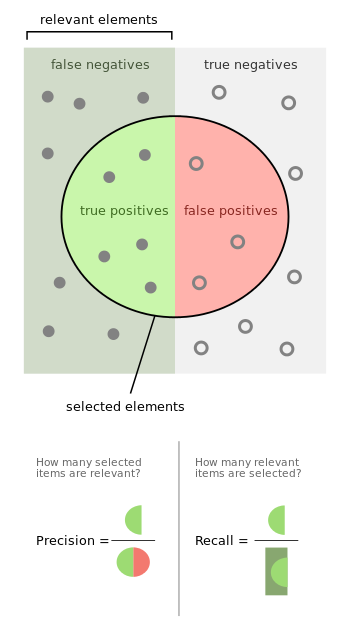

DummyClassifier

In [ ]:
modelo_dummy = DummyClassifier()

Regressão Logística

In [ ]:
modelo_logistic = LogisticRegression()

Árvore de decisão

In [ ]:
modelo_arvore = DecisionTreeClassifier()

Random Forest Classifier

In [ ]:
modelo_floresta = RandomForestClassifier()

Extra Trees

In [ ]:
modelo_arvore_extra = ExtraTreesClassifier()

## Observando a suscetividade a overfit

Defininco uma função para observação do overfit

In [ ]:
def roda_modelo_overfit(modelo, dados, n_splits, n_repeats): 

  np.random.seed(1231234)
  dados = dados.sample(frac=1).reset_index(drop=True) 
  X_columns = dados_metricas_corr.describe().columns
  X = dados_metricas_corr[X_columns].drop(['PATIENT_VISIT_IDENTIFIER', 'ICU'], axis=1)
  y = dados_metricas_corr['ICU'] #definindo x e y

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

  modelo.fit(X_train, y_train)
  predicao = modelo.predict(X_test)
  prob_predict = modelo.predict_proba(X_test)

  cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats) # estratificando o modelo
  resultados = cross_validate(modelo, X, y, cv=cv, scoring='roc_auc', return_train_score=True) # validação cruzada do modelo

  auc_medio = np.mean(resultados['test_score'])
  auc_medio_treino = np.mean(resultados['train_score']) # retornando tbm o auc do modelo de treino

  auc_std = np.std(resultados['test_score'])

  #print(f'AUC Médio: {auc_medio} Intervalo: {auc_medio - (2 * auc_std)} - {auc_medio + (2 * auc_std)}')
  print(f'AUC {auc_medio} - {auc_medio_treino}')
  return auc_medio, auc_medio_treino

### Overfit da árvore de decisão

AUC 0.5837300233846286 - 0.6465668419906478
AUC 0.7000482442669944 - 0.755227865752459
AUC 0.7041118421052631 - 0.8184661314930882
AUC 0.7003081423229449 - 0.8766095121642716
AUC 0.6888909206754602 - 0.9261859071662641
AUC 0.6603827010323721 - 0.9616153062522474
AUC 0.6501508146902885 - 0.9817838775379883
AUC 0.6357422127570154 - 0.9922455769982933
AUC 0.6446193195288591 - 0.9963180463729661
AUC 0.6452615885921807 - 0.9984697812760251
AUC 0.6535291391870338 - 0.9994286894173386
AUC 0.6554788123949308 - 0.9998135980177273
AUC 0.6509194159769817 - 0.9999427850345904
AUC 0.6515197449243502 - 0.99999898892877




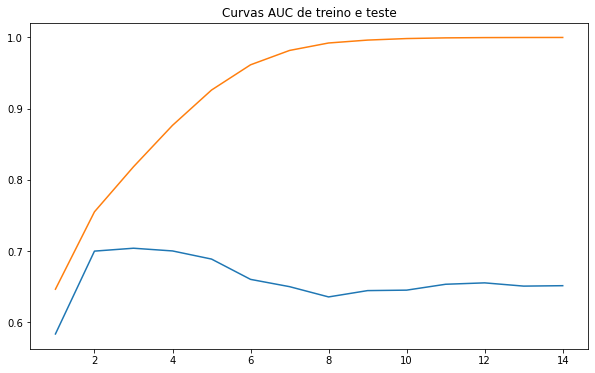

In [ ]:
teste_lista = []
treino_lista = []

for i in range(1, 15):
  modelo_arvore_overfit = DecisionTreeClassifier(max_depth=i)
  teste, treino = roda_modelo_overfit(modelo_arvore_overfit, dados_limpos, 5, 10)
  teste_lista.append(teste)
  treino_lista.append(treino)

print('\n')
x = range(1, 15)
plt.figure(figsize=(10,6))
plt.title('Curvas AUC de treino e teste')
plt.plot(x, teste_lista)
plt.plot(x, treino_lista)
plt.show();

No gráfico acima, vemos que a partir da quinta tentativa o modelo de teste passa ter um AUC menor e a partir da oitava o modelo de treino passa a ter valores muito próximos de 1 (indicando overfit).

### Modelo Floresta

AUC 0.7786403239363766 - 0.8441350073793873
AUC 0.7902816527652053 - 0.8775138367093355
AUC 0.7941447637829218 - 0.9133772082645045
AUC 0.7989086679382733 - 0.9478717127137297
AUC 0.7982098770421139 - 0.9742854934099237
AUC 0.7980562200956938 - 0.9888568732990618
AUC 0.7981866001767318 - 0.9963234893746443
AUC 0.7970742812190182 - 0.9992015149387822
AUC 0.7964772323160483 - 0.9999401517978136
AUC 0.7973580825143326 - 0.999997976783021
AUC 0.7955828308871072 - 1.0
AUC 0.7937831102633734 - 1.0
AUC 0.795063236831329 - 1.0
AUC 0.7946188884757964 - 1.0




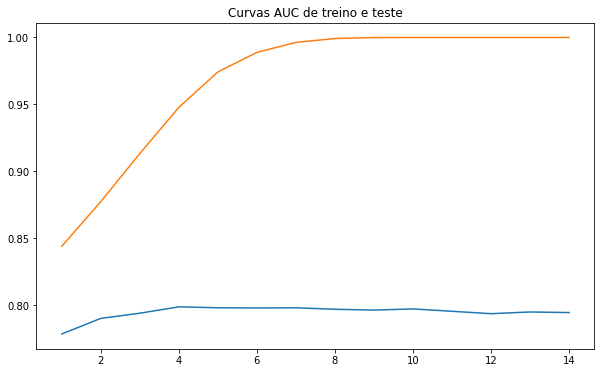

In [ ]:
teste_lista = []
treino_lista = []

for i in range(1, 15):
  modelo_floresta_overfit = RandomForestClassifier(max_depth=i)
  teste, treino = roda_modelo_overfit(modelo_floresta_overfit, dados_limpos, 5, 10)
  teste_lista.append(teste)
  treino_lista.append(treino)

print('\n')
x = range(1, 15)
plt.figure(figsize=(10,6))
plt.title('Curvas AUC de treino e teste')
plt.plot(x, teste_lista)
plt.plot(x, treino_lista)
plt.show();

No gráfico acima, vemos que a partir da sétima rodada o modelo de treino passa a ter valores muito próximos de 1, contudo o modelo de teste não mostra queda brusca - o que é positivo.

### Modelo Árvores Extras

AUC 0.7856343080520714 - 0.8148661745403669
AUC 0.7926874407302038 - 0.839274816272598
AUC 0.7979436883055305 - 0.8668858026002133
AUC 0.7988592315401525 - 0.8981362451741305
AUC 0.7994295551532394 - 0.9304603118213259
AUC 0.7984839190266821 - 0.956984836387594
AUC 0.798604344476055 - 0.9759933795301465
AUC 0.7982475537738698 - 0.9877096476662368
AUC 0.7946979799775852 - 0.9945476588584268
AUC 0.793425161106082 - 0.9984370214169038
AUC 0.7929608765464029 - 0.9997900950632093
AUC 0.7906257678132679 - 0.9999939003136982
AUC 0.7903875301737143 - 1.0
AUC 0.7910555681279363 - 1.0




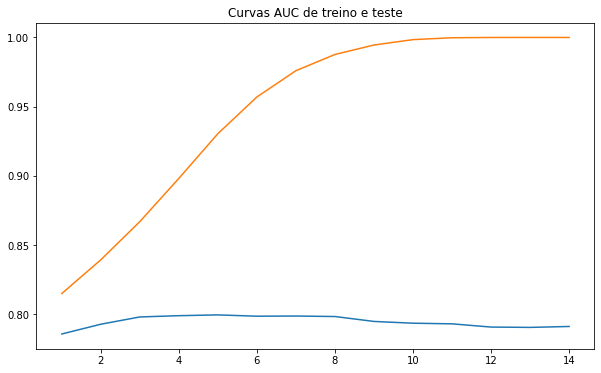

In [ ]:
teste_lista = []
treino_lista = []

for i in range(1, 15):
  modelo_arvore_extra_overfit = ExtraTreesClassifier(max_depth=i)
  teste, treino = roda_modelo_overfit(modelo_arvore_extra_overfit, dados_limpos, 5, 10)
  teste_lista.append(teste)
  treino_lista.append(treino)

print('\n')
x = range(1, 15)
plt.figure(figsize=(10,6))
plt.title('Curvas AUC de treino e teste')
plt.plot(x, teste_lista)
plt.plot(x, treino_lista)
plt.show();

No gráfico, notamos um comportamento parecido com o comportamento da Random Forest, mas com uma queda mais brusca a partir da oitava rodada.

### Conclusão: O modelo Random Forest apresenta melhor comportamento de overfit.

## Modelos com 5 splits e 10 repeats
Agora vamos ver como os modelos se saem com 5 splits e 10 repeats - com o intuito de reduzir a aleatoriedade.  
Serão usados quatro indicadores para escolhermos o melhor modelo:
- Desvio padrão de AUC médio;
- AUC médio;
- Classificação (Precision, recall, F1 e accuracy);
- Matriz de confusão.

### Testando os modelos

#### Dummy Classifier

AUC Intervalo: 0.3740713977716349 - 0.6171623838568836
-----------------------------------------------------------
AUC 0.49561689081425925 - 0.5023438728469453
-----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.48      0.55      0.51        47
           1       0.38      0.32      0.35        41

    accuracy                           0.44        88
   macro avg       0.43      0.44      0.43        88
weighted avg       0.44      0.44      0.44        88

-----------------------------------------------------------
Matriz de confusão do modelo


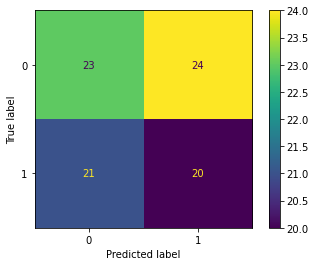

None


In [ ]:
roda_modelo_cv(modelo_dummy, dados_metricas_corr, 5, 10)

#### Regressão Logística

AUC Intervalo: 0.6778784477320541 - 0.8785973701911327
-----------------------------------------------------------
AUC 0.7782379089615934 - 0.8048329051801436
-----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        47
           1       0.71      0.61      0.66        41

    accuracy                           0.70        88
   macro avg       0.71      0.70      0.70        88
weighted avg       0.71      0.70      0.70        88

-----------------------------------------------------------
Matriz de confusão do modelo


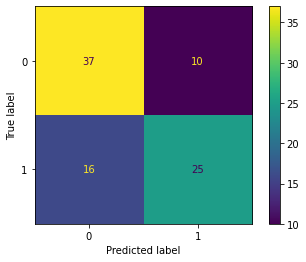

None


In [ ]:
roda_modelo_cv(modelo_logistic, dados_metricas_corr, 5, 10)

#### Modelo Árvore

AUC Intervalo: 0.5433097104892439 - 0.7701338916056739
-----------------------------------------------------------
AUC 0.6567218010474589 - 1.0
-----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.70      0.64        47
           1       0.56      0.44      0.49        41

    accuracy                           0.58        88
   macro avg       0.58      0.57      0.57        88
weighted avg       0.58      0.58      0.57        88

-----------------------------------------------------------
Matriz de confusão do modelo


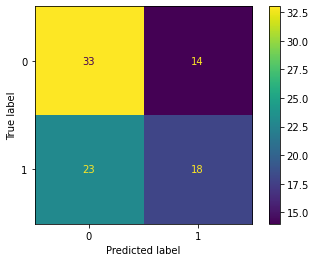

None


In [ ]:
roda_modelo_cv(modelo_arvore, dados_metricas_corr, 5, 10)

#### Modelo Floresta

AUC Intervalo: 0.7005993072433176 - 0.8933633635614586
-----------------------------------------------------------
AUC 0.7969813354023881 - 1.0
-----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.74      0.74        47
           1       0.70      0.68      0.69        41

    accuracy                           0.72        88
   macro avg       0.71      0.71      0.71        88
weighted avg       0.72      0.72      0.72        88

-----------------------------------------------------------
Matriz de confusão do modelo


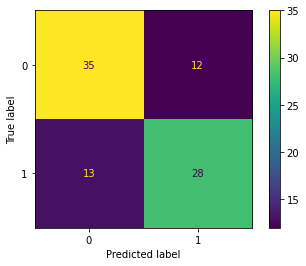

None


In [ ]:
roda_modelo_cv(modelo_floresta, dados_metricas_corr, 5, 10)

#### Modelo Árvore Extra

AUC Intervalo: 0.6948761798308922 - 0.8860758008579304
-----------------------------------------------------------
AUC 0.7904759903444113 - 1.0
-----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.74      0.69        47
           1       0.65      0.54      0.59        41

    accuracy                           0.65        88
   macro avg       0.65      0.64      0.64        88
weighted avg       0.65      0.65      0.64        88

-----------------------------------------------------------
Matriz de confusão do modelo


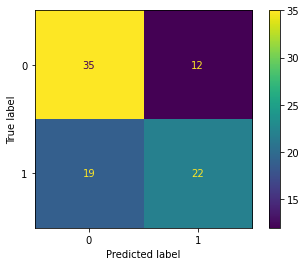

None


In [ ]:
roda_modelo_cv(modelo_arvore_extra, dados_metricas_corr, 5, 10)

#Modelo com melhor resultado: Floresta
Como visto acima, o modelo "Random Forest Classifier" mostrou os melhores índices. Agora precisamos ajustar seus hiperparâmetros, abaixo fazemos alguns testes:

## Alterando hiperparâmetros do modelo

Alterando critério de "Gini" para "Entropia"

AUC Intervalo: 0.6951740266850586 - 0.8937253736123678
-----------------------------------------------------------
AUC 0.7944497001487132 - 1.0
-----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        47
           1       0.74      0.63      0.68        41

    accuracy                           0.73        88
   macro avg       0.73      0.72      0.72        88
weighted avg       0.73      0.73      0.72        88

-----------------------------------------------------------
Matriz de confusão do modelo


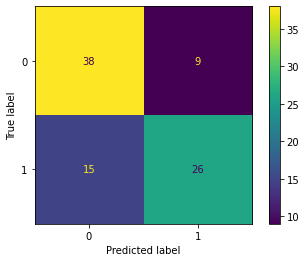

None


In [ ]:
modelo_floresta = RandomForestClassifier(criterion='entropy') # alterando critério
roda_modelo_cv(modelo_floresta, dados_metricas_corr, 5, 10)

Diminui o numero de falsos positivos mas aumenta o de falsos negativos. Nesse caso, os falsos positivos (cuidado extra) são menos problemáticos que os falsos negativos (cuidado a menos). Portando, mantemos o critério de entropia como ideal.

Alterando o número de repetições

AUC Intervalo: 0.7044599716061354 - 0.8859899858273746
-----------------------------------------------------------
AUC 0.795224978716755 - 1.0
-----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.74      0.74        47
           1       0.70      0.68      0.69        41

    accuracy                           0.72        88
   macro avg       0.71      0.71      0.71        88
weighted avg       0.72      0.72      0.72        88

-----------------------------------------------------------
Matriz de confusão do modelo


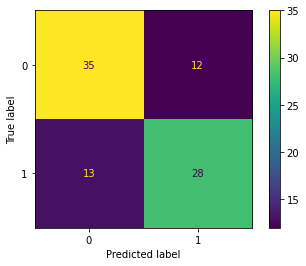

None


In [ ]:
modelo_floresta = RandomForestClassifier()
roda_modelo_cv(modelo_floresta, dados_metricas_corr, 5, 50) # aumentando as repetições

Não fez diferença e consumiu mais processamento. Deixamos com 10 repetições.

Alterando max_depth

AUC Intervalo: 0.7054998354349451 - 0.8969387664444461
-----------------------------------------------------------
AUC 0.8012193009396956 - 0.974797281702251
-----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.72      0.69        47
           1       0.64      0.56      0.60        41

    accuracy                           0.65        88
   macro avg       0.65      0.64      0.64        88
weighted avg       0.65      0.65      0.65        88

-----------------------------------------------------------
Matriz de confusão do modelo


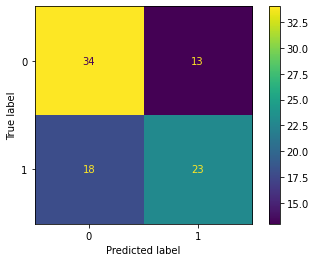

None


In [ ]:
modelo_floresta = RandomForestClassifier(max_depth=5) # alterando a profundidade máxima das árvores
roda_modelo_cv(modelo_floresta, dados_metricas_corr, 5, 10) 

Aumentou tanto o número de falsos positivos quanto de falsos negativos. Mantemos o padrão.

# Conclusão

Podemos concluir, com base nos testes e parâmetros, que o melhor modelo é o RandomForestClassifier, com seus parâmetros padrão, 5 samples e 10 repetições. Os resultados vemos abaixo:

AUC Intervalo: 0.7005993072433176 - 0.8933633635614586
-----------------------------------------------------------
AUC 0.7969813354023881 - 1.0
-----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.74      0.74        47
           1       0.70      0.68      0.69        41

    accuracy                           0.72        88
   macro avg       0.71      0.71      0.71        88
weighted avg       0.72      0.72      0.72        88

-----------------------------------------------------------
Matriz de confusão do modelo


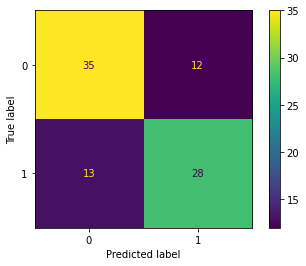

None


In [ ]:
modelo_floresta = RandomForestClassifier()
roda_modelo_cv(modelo_floresta, dados_metricas_corr, 5, 10)

Nesse modelo temos uma acurácia de 72%, 70% de precisão (taxa de positivos verdadeiros sobre positivos acusados pelo modelo) e 68% de recall (taxa de positivos verdadeiros sobre positivos verdadeiros mais falsos negativos).

Obrigado por ler esse trabalho :)